<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/Copy_of_PSD_histogram_knn_check_segmentation_fig_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#import scikit-image
import skimage
import pandas as pd
from collections import Counter

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 6.3MB/s 


In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
df = pd.read_excel('segment_may_08.xlsx')
df_classfica = df.copy()

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.79 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/MarquesGabi_Routines


In [ ]:
n1 = 20 # neurons in hidden layer
n2 = 20 # neurons in hidden layer


In [ ]:
print(df)

    Unnamed: 0  Width           0  ...        9997        9998        9999
0            0    121  145.335907  ...  103.867767  101.520676   99.030121
1            1     89    1.000000  ...  173.258438  170.752808  169.000000
2            2     74  172.000000  ...  185.594589  184.648651  184.000000
3            3    118  148.610168  ...  245.525421  243.114334  244.870728
4            4     88  118.000000  ...    1.000000    1.136364    2.000000
5            5     90  157.000000  ...  109.666672  112.333336  115.000000
6            6    109  182.752289  ...  147.959091  146.986359  150.428833
7            7     46  122.000000  ...  142.782608  137.000000  137.000000
8            8     39  251.000000  ...  182.000000  182.000000  182.000000
9            9     58  155.000000  ...  107.000000  108.448273  109.000000
10          10    109  191.343903  ...  192.805237  188.812042  186.406021
11          11    105    1.000000  ...   51.374153   49.285713   49.911564
12          12    140  14

In [ ]:
# leitura dos dados
df1=pd.read_excel("ImgGrao_a.xlsx")
df2=pd.read_excel("ImgGrao_b.xlsx")
df3=pd.read_excel("ImgIndef.xlsx")
df4=pd.read_excel("ImgVarios.xlsx")
df5=pd.read_excel("ImgBuraco.xlsx")

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df.head()
df_all = df.copy()

In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(180, 10002)
(179, 10002)
(180, 10002)
(162, 10002)
(180, 10002)


In [ ]:
w = df_all['Type']
y = []
for wi in w:
  if(wi == 'G'):
    y.append(1)
  elif(wi == 'B'):
    y.append(2)
  elif(wi == 'I'):
    y.append(2)
  elif(wi == 'V'):
    y.append(2)

In [ ]:
df_all.drop(['Unnamed: 0','Type'], axis='columns', inplace=True)

In [ ]:
y_ann = y.copy()
X =np.array(df_all.copy())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:
X_test.shape

(265, 10000)

In [ ]:
'''
model = MLPClassifier(hidden_layer_sizes=(n1,n2), activation='tanh',
                      solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)
'''
model = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

prediction = model.predict(X_test)
  
y =np.copy(y_test)
data = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])

confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
# print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']
print('n1, n2 =',n1,n2,'true',Counter(y_true),'calc',Counter(y_pred))

n1, n2 = 20 20 true Counter({2: 159, 1: 106}) calc Counter({2: 148, 1: 117})


In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Files = ['segment_may_01.xlsx','segment_may_02.xlsx','segment_may_03.xlsx',
         'segment_may_04.xlsx','segment_may_05.xlsx','segment_may_06.xlsx',
         'segment_may_07.xlsx','segment_may_08.xlsx']

!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Files = ["segment_may_08.xlsx","segment_may_09.xlsx",
         "segment_may_10.xlsx","segment_may_11.xlsx","segment_may_12.xlsx",
         "segment_may_13.xlsx","segment_may_14.xlsx","segment_may_15.xlsx",
         "segment_may_16.xlsx","segment_may_17.xlsx","segment_may_18.xlsx",
         "segment_may_19.xlsx","segment_may_20.xlsx","segment_may_21.xlsx",
         "segment_may_22.xlsx" ]
df_grain = []
df_width  = []
for nome in Files:
  df = pd.read_excel (nome)
  df_ann =df.copy()
  Width = df['Width']
  df_psd = df_ann.copy()
  del df_ann['Width']
  del df_ann['Unnamed: 0']
  result = np.array(df_ann)/255
  df = df.dropna()
  prediction = model.predict(result)
  kk = 0
  for yi in prediction:
    if(yi == 1):
      df_grain.append(df_psd.iloc[kk,:])
      df_width.append(Width.iloc[kk])
    kk = kk +1
Names = df_psd.columns

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.42 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/MarquesGabi_Routines/MarquesGabi_Routines
Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.47 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/MarquesGabi_Routines/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
df_grain = pd.DataFrame(df_grain, columns= Names)
del df_grain['Unnamed: 0']
print(df_grain)

    Width           0           1  ...        9997        9998        9999
1    89.0    1.000000    1.000000  ...  173.258438  170.752808  169.000000
10  109.0  191.343903  189.357559  ...  192.805237  188.812042  186.406021
16   90.0  145.000000  144.111115  ...  150.555557  149.111115  150.000000
25   65.0  158.000000  158.923080  ...  196.000000  196.000000  196.000000
34  132.0  156.602386  160.980713  ...  236.763092  234.526169  229.335159
..    ...         ...         ...  ...         ...         ...         ...
18  140.0  209.387772  179.285736  ...  190.755127  192.428589  193.000000
24  144.0  225.398926  225.611115  ...  151.610336  132.459869  117.757721
33   56.0  202.000000  201.571426  ...  200.000000  199.214279  199.000000
35   51.0  161.000000  161.039215  ...  159.000000  156.117645  156.000000
45   36.0  142.000000  142.000000  ...   92.777779   93.000000   93.000000

[147 rows x 10001 columns]


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 565, done.
remote: Counting objects: 100% (326/326), done.
remote: Compressing objects: 100% (325/325), done.
remote: Total 565 (delta 198), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (565/565), 4.91 MiB | 13.03 MiB/s, done.
Resolving deltas: 100% (335/335), done.
/content/marquesgabi_fev_2020/MarquesGabi_Routines/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

from Get_PSDArea_New_100_100 import PSDArea

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.97 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/MarquesGabi_Routines/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines


In [ ]:
Area_All, Diameter_All=PSDArea(df_grain) 

In [ ]:
diam = Diameter_All.copy()
PSD_value, Perc_value = PSD(diam)
print(Perc_value)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.68027211  1.36054422 97.95918367]


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 7.78 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/MarquesGabi_Routines/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


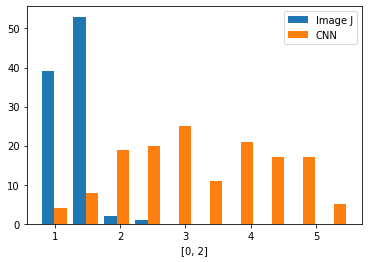

In [ ]:
plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])